#  Startup Funding Analysis
#### Possible questions which could be answered are:
#### ● How does the funding ecosystem change with time?
#### ● Do cities play a major role in funding?
#### ● Which industries are favored by investors for funding?
#### ● Who are the important investors in the Indian Ecosystem?
#### ● How much funds do startups generally get in India?

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from mlxtend.classifier import StackingClassifier
import seaborn as sns
import math
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, log_loss, make_scorer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV,cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
import pydotplus
from IPython.display import Image
import io
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, XGBRegressor
import pickle
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
import numpy as np, pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import load_iris
import sklearn.cluster as cluster
import time
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
import os

# Loading Dataset and Column Types

In [2]:
fund = pd.read_csv('C:/Users/Mandar/Desktop/startup funding/startup__funding.csv')

In [3]:
fund.head()
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2999 non-null   int64 
 1   Date              2999 non-null   object
 2   StartupName       2999 non-null   object
 3   IndustryVertical  2828 non-null   object
 4   SubVertical       2073 non-null   object
 5   CityLocation      2825 non-null   object
 6   Investorname      2976 non-null   object
 7   InvestmentnType   2999 non-null   object
 8   AmountinUSD       2033 non-null   object
 9   Remarks           415 non-null    object
 10  State             2825 non-null   object
dtypes: int64(1), object(10)
memory usage: 257.9+ KB


# Missing values

In [4]:
#Rows
total = fund.isnull().sum(axis=1).sort_values(ascending=False)
percent = (fund.isnull().sum(axis=1))/(fund.isnull().count(axis=1).sort_values(ascending=False))
missing_data = pd.concat([total,percent], axis=1, keys=['Total_missing_values_per_row', 'Percent'])
missing_data.head()

,Total_missing_values_per_row,Percent
0,1,0.090909
1,1,0.090909
2,1,0.090909
3,1,0.090909
4,1,0.090909


In [5]:
#missing data observing in columns
total = fund.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((fund.isnull().sum(axis=0)/fund.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.iloc[1:,:]

,Total,Percent
AmountinUSD,966,32.210737
SubVertical,926,30.876959
State,174,5.801934
CityLocation,174,5.801934
IndustryVertical,171,5.701901
Investorname,23,0.766922
InvestmentnType,0,0.000000
StartupName,0,0.000000
Date,0,0.000000
SNo,0,0.000000


# Fixing Data

In [6]:
fund['StartupName'] = fund['StartupName'].replace({"Flipkart.com":"Flipkart"})
fund['IndustryVertical']=fund['IndustryVertical'].replace({"ECommerce":"eCommerce"})
fund['IndustryVertical']=fund['IndustryVertical'].replace({"ecommerce":"eCommerce"})
fund['IndustryVertical']=fund['IndustryVertical'].replace({"Ecommerce":"eCommerce"})
fund['InvestmentnType']=fund['InvestmentnType'].replace({"Crowd funding":"Crowd Funding"})
fund['InvestmentnType']=fund['InvestmentnType'].replace({"SeedFunding":"Seed Funding"})
fund['InvestmentnType']=fund['InvestmentnType'].replace({"PrivateEquity":"Private Equity"})
fund['StartupName']=fund['StartupName'].replace({"practo":"Practo"})
fund['StartupName']=fund['StartupName'].replace({"couponmachine.in":"Couponmachine"})
fund['StartupName']=fund['StartupName'].replace({"Olacabs":"Ola Cabs"})
fund['StartupName']=fund['StartupName'].replace({"Ola":"Ola Cabs"})
fund['Investorname']=fund['Investorname'].replace({"Undisclosed investors":"Undisclosed Investors"})
fund['Investorname']=fund['Investorname'].replace({"Undisclosed Investor":"Undisclosed Investors"})
fund['Investorname']=fund['Investorname'].replace({"Undisclosed":"Undisclosed Investors"})
fund['Investorname']=fund['Investorname'].replace({"undisclosed investors":"Undisclosed Investors"})
fund['Investorname']=fund['Investorname'].replace({"Undisclosed investor":"Undisclosed Investors"})
fund['Investorname']=fund['Investorname'].replace({" Sequoia Capital":"Sequoia Capital"})
fund['Investorname']=fund['Investorname'].replace({" Accel Partners":"Accel Partners"})
fund['Investorname']=fund['Investorname'].replace({" Blume Ventures":"Blume Ventures"})
fund['Investorname']=fund['Investorname'].replace({" SAIF Partners":"SAIF Partners"})
fund['Investorname']=fund['Investorname'].replace({" Kalaari Capital":"Kalaari Capital"})

# Flipkart and Paytm were funded multiple times

In [7]:
fund[fund['StartupName'] == "Paytm"]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,Remarks,State
216,218,26-06-2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity Round,8950000,NaN,Uttar Pradesh
795,799,18-05-2017,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity Round,1400000000,NaN,Karnataka
1458,1482,30-08-2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity Round,60000000,NaN,Karnataka
2424,2460,29-09-2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity Round,680000000,Late Stage (Alibaba @ 40% equity),Delhi
2845,2902,13-03-2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity Round,NaN,More details,NaN
2903,2961,05-02-2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity Round,NaN,Strategic Investment (25% stake),NaN


In [8]:
fund[fund['StartupName'] == "Flipkart"]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,Remarks,State
616,618,11-08-2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity Round,2500000000,NaN,Karnataka
738,741,26-06-2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity Round,71000000,NaN,Karnataka
931,940,21-03-2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity Round,1400000000,NaN,Karnataka
997,1010,20-02-2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity Round,38700000,NaN,Karnataka
2603,2654,28-07-2015,Flipkart,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity Round,700000000,"Late Stage, 10th Round More here",Karnataka
2644,2698,04-06-2015,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity Round,50000000,Late Stage,Karnataka


# Convert Date to Date Time

In [9]:
fund['Date'] = pd.to_datetime(fund['Date'])

In [10]:
fund.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,Remarks,State
0,0,2019-05-09,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000,NaN,Maharashtra
1,1,2019-04-09,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series,3300000,NaN,Maharashtra
2,2,2019-04-09,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000,NaN,Maharashtra
3,3,2019-04-09,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,Private Equity Round,5000000,NaN,Telangana
4,4,2019-04-09,75F,IoT,Building automation system,Mumbai,Breakthrough Energy Ventures,Series,18000000,NaN,Maharashtra


In [11]:
fund.info()
fund['AmountinUSD'] = fund['AmountinUSD'].str.replace(',','').astype(float)
fund.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SNo               2999 non-null   int64         
 1   Date              2999 non-null   datetime64[ns]
 2   StartupName       2999 non-null   object        
 3   IndustryVertical  2828 non-null   object        
 4   SubVertical       2073 non-null   object        
 5   CityLocation      2825 non-null   object        
 6   Investorname      2976 non-null   object        
 7   InvestmentnType   2999 non-null   object        
 8   AmountinUSD       2033 non-null   object        
 9   Remarks           415 non-null    object        
 10  State             2825 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 257.9+ KB


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,Remarks,State
0,0,2019-05-09,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0,NaN,Maharashtra
1,1,2019-04-09,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series,3300000.0,NaN,Maharashtra
2,2,2019-04-09,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0,NaN,Maharashtra
3,3,2019-04-09,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,Private Equity Round,5000000.0,NaN,Telangana
4,4,2019-04-09,75F,IoT,Building automation system,Mumbai,Breakthrough Energy Ventures,Series,18000000.0,NaN,Maharashtra


In [12]:
fund_withAmts = fund.dropna(subset=['AmountinUSD', 'CityLocation'])
fund_withAmts.head()
fund_withAmts.shape

(1901, 11)

In [13]:
fund_withAmts['CityLocation'].value_counts()

Bangalore     583
Mumbai        424
New Delhi     246
Gurgaon       236
Pune           82
Hyderabad      75
Chennai        74
Noida          54
Ahemadabad     29
Delhi          25
Jaipur         14
Kolkata        11
Goa             9
Vadodara        6
Chandigarh      6
Indore          5
Coimbatore      4
Udaipur         3
Bhopal          3
Kanpur          2
Lucknow         1
Varanasi        1
Jodhpur         1
Nagpur          1
Faridabad       1
Bhubneswar      1
Trivandrum      1
Haryana         1
Kochi           1
Surat           1
Name: CityLocation, dtype: int64

Consumer Internet       588
Technology              308
eCommerce               170
Finance                  56
Healthcare               43
E-Commerce               22
Logistics                22
Education                17
Food & Beverage          15
Ed-Tech                  12
E-commerce                8
IT                        8
FinTech                   6
Fin-Tech                  6
Food and Beverage         5
Online Food Delivery      5
Logistics Tech            4
Others                    4
Health and Wellness       4
EdTech                    3
Name: IndustryVertical, dtype: int64


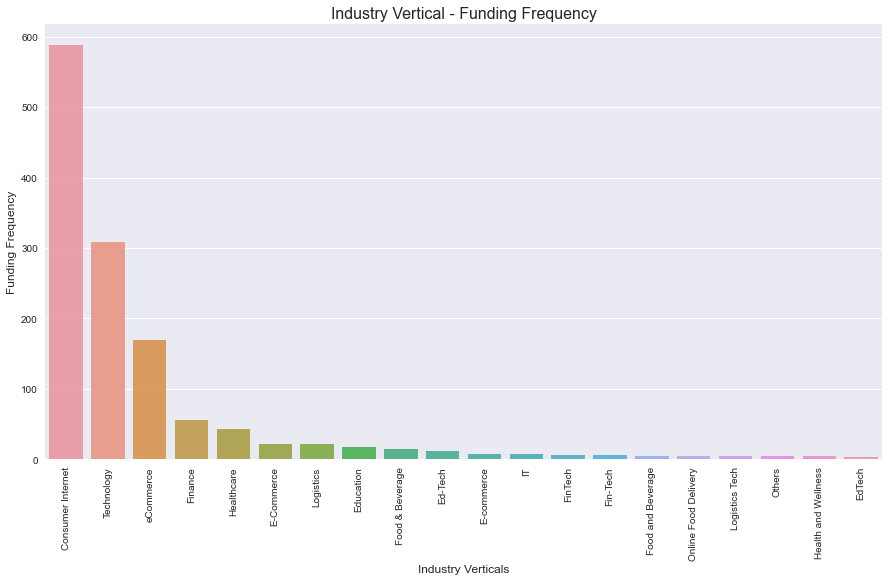

In [14]:
IndustryVertical = fund_withAmts['IndustryVertical'].value_counts().head(20)
print(IndustryVertical)
plt.figure(figsize=(15,8))
sns.barplot(IndustryVertical.index, IndustryVertical.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Industry Verticals', fontsize=12)
plt.ylabel('Funding Frequency', fontsize=12)
plt.title("Industry Vertical - Funding Frequency", fontsize=16)
plt.show()

Consumer Internet (19.4%), Technology (8%) and eCommerce Industries (6.3%) were most favoured for funding in the years


Seed Funding            1408
Private Equity Round    1365
Angel Funding            113
Series                    61
Debt                      28
Seed Round                 5
Venture Round              3
Equity                     3
Crowd Funding              2
Angel                      2
Structured Debt            1
Term Loan                  1
Corporate Round            1
Inhouse Funding            1
Mezzanine                  1
Angel Round                1
Maiden Round               1
Single Venture             1
Bridge Round               1
Name: InvestmentnType, dtype: int64


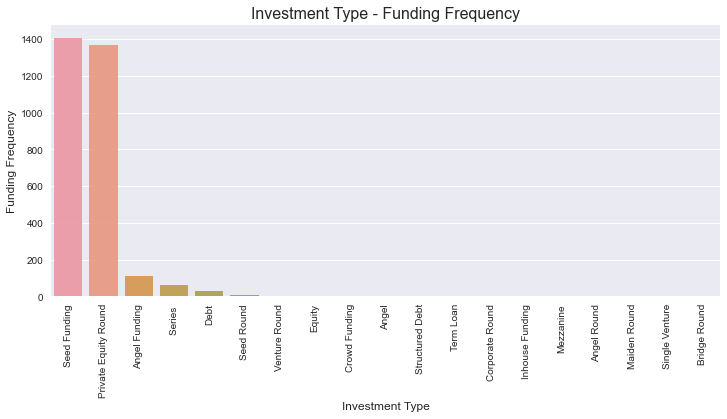

In [15]:
Investment_Type = fund['InvestmentnType'].value_counts()
print(Investment_Type)
plt.figure(figsize=(12,5))
sns.barplot(Investment_Type.index, Investment_Type.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Funding Frequency', fontsize=12)
plt.title("Investment Type - Funding Frequency", fontsize=16)
plt.show()

Undisclosed Investors        116
Ratan Tata                    30
Indian Angel Network          23
Kalaari Capital               16
Group of Angel Investors      15
Sequoia Capital               15
Accel Partners                12
Venture Catalysts             11
Brand Capital                 11
SAIF Partners                 10
RoundGlass Partners           10
Nexus Venture Partners         9
Info Edge (India) Ltd          9
Blume Ventures                 8
Trifecta Capital               8
Unitus Seed Fund               8
Tiger Global                   8
Matrix Partners                7
YouWeCan Ventures              7
Bessemer Venture Partners      6
Name: Investorname, dtype: int64


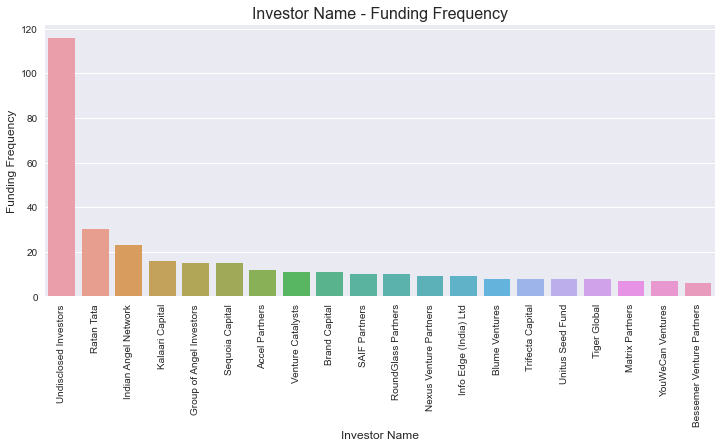

In [16]:
Investor_name = fund['Investorname'].value_counts().head(20)
print(Investor_name)
plt.figure(figsize=(12,5))
sns.barplot(Investor_name.index, Investor_name.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Investor Name', fontsize=12)
plt.ylabel('Funding Frequency', fontsize=12)
plt.title("Investor Name - Funding Frequency", fontsize=16)
plt.show()

Important Investors in Indian Startup Scene - Ratan Tata, Indian Angel Network, Kalaari Capital, Sequoia Capital


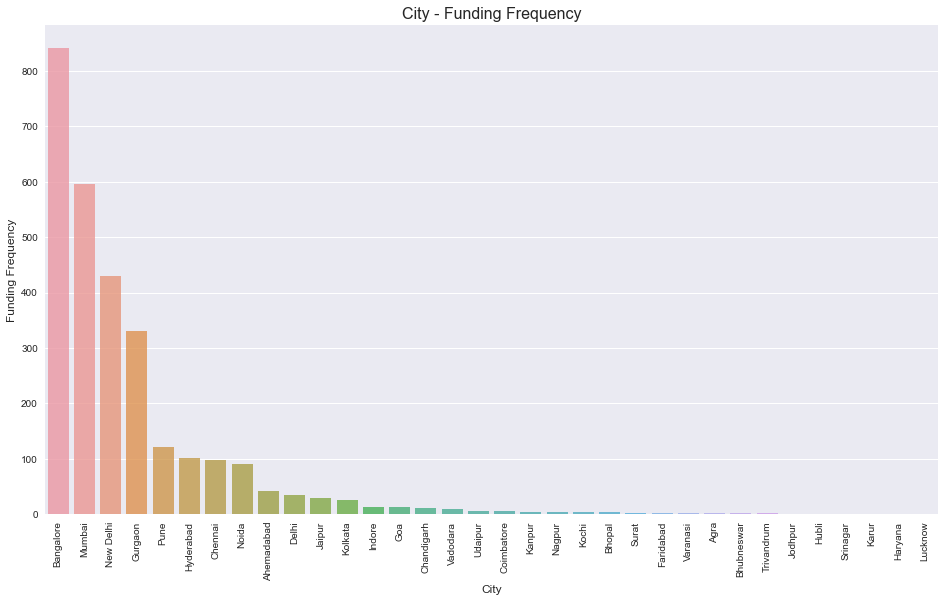

In [17]:
fund = fund['CityLocation'].value_counts()
plt.figure(figsize=(16,9))
sns.barplot(fund.index, fund.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('City', fontsize=12)
plt.ylabel('Funding Frequency', fontsize=12)
plt.title('City - Funding Frequency', fontsize=16)
plt.show()

Investors Count
Banglore 627 (26.4%)
Mumbai 446 (18.8%)
New Delhi 381 (16.1%)
Tier II, III cities: Varanasi, Indore, Siliguri, Karur, Nagpur, Belgaum, Kozhikode

# Keep Month and Year out of Date Column

In [18]:
fund_withAmts['MonthYear'] = fund_withAmts['Date'].map(lambda x: x.strftime('%Y-%m'))

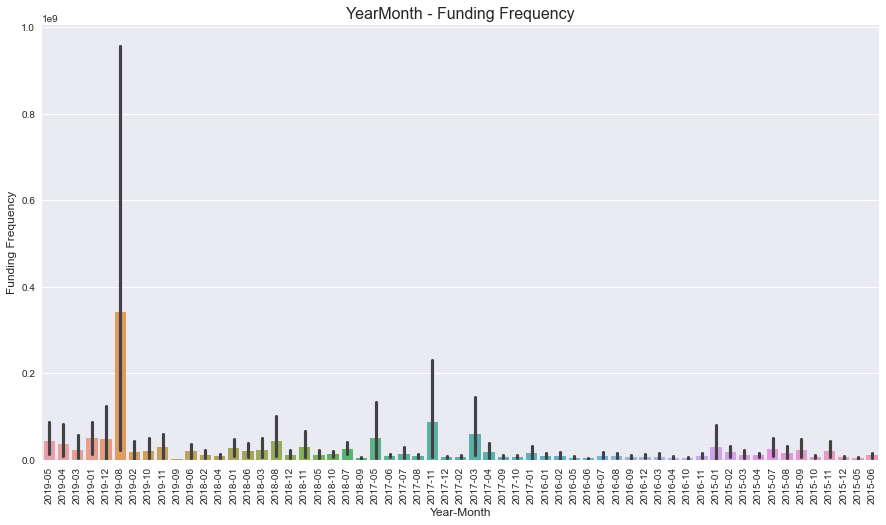

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(fund_withAmts['MonthYear'], fund_withAmts['AmountinUSD'], alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Funding Frequency', fontsize=12)
plt.title("YearMonth - Funding Frequency", fontsize=16)
plt.show()

March '17 and May '17 - Flipkart and Paytm had received funding

# Drop Columns which are not relevant

In [20]:
fund_withAmts.drop(columns = ['Date', 'SNo', 'Remarks','State'], inplace=True, axis=1)

In [21]:
fund_withAmts.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,MonthYear
0,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0,2019-05
1,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series,3300000.0,2019-04
2,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0,2019-04
3,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,Private Equity Round,5000000.0,2019-04
4,75F,IoT,Building automation system,Mumbai,Breakthrough Energy Ventures,Series,18000000.0,2019-04


# Further EDA

In [22]:
fund_withAmts.shape
fund_withAmts['AmountinUSD'].value_counts()

1000000.0     158
500000.0      103
2000000.0      65
5000000.0      60
3000000.0      60
             ... 
890000.0        1
430665.0        1
23500000.0      1
935089.0        1
768000.0        1
Name: AmountinUSD, Length: 428, dtype: int64

# Investments

## 1: How does the funding ecosystem change with time? (Number of funding per month)

Mean Investment from 2015-2017 $ 17506755
Median Investment from 2015-2017 $ 1600000
Maximum Single Investment from 2015-2017 $ 3900000000
Minimum Single Investment from 2015-2017 $ 18000


Text(0.5, 1.0, 'Funding vs Month-Year')

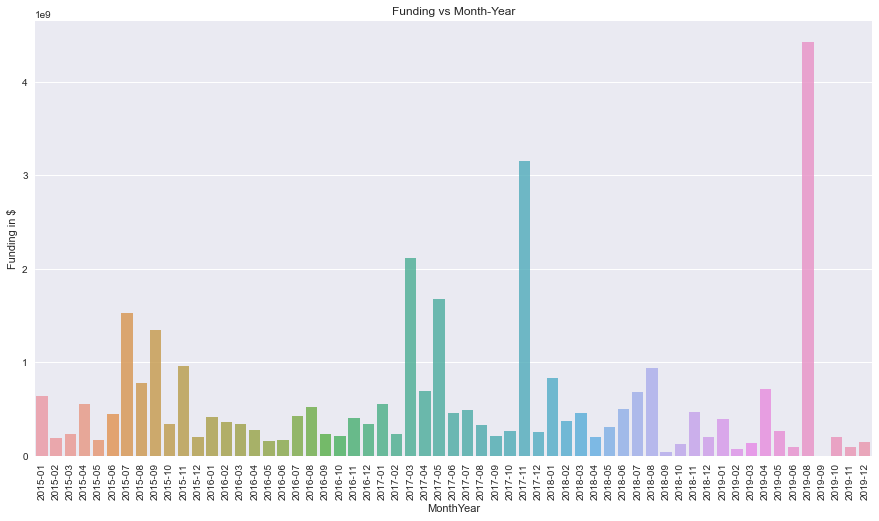

In [23]:
print('Mean Investment from 2015-2017 $ {:.0f}'.format(np.mean(fund_withAmts['AmountinUSD'])))
print('Median Investment from 2015-2017 $ {:.0f}'.format(np.median(fund_withAmts['AmountinUSD'])))
print('Maximum Single Investment from 2015-2017 $ {:.0f}'.format(np.max(fund_withAmts['AmountinUSD'])))
print('Minimum Single Investment from 2015-2017 $ {:.0f}'.format(np.min(fund_withAmts['AmountinUSD'])))
funding_permonth=fund_withAmts['AmountinUSD'].groupby(fund_withAmts['MonthYear']).sum()
plt.figure(figsize=(15,8))
sns.barplot(x=funding_permonth.index, y=funding_permonth.values, alpha=0.8)
plt.xticks(rotation=90)
plt.ylabel('Funding in $')
plt.title('Funding vs Month-Year')

In [ ]:
As we can see that startups got more funding in August  2019(Total funding in January 2016 ) Above visualization shows how funding varies from one month to another.

## 2: How much funds does startups generally get in India?(maximum funding, minimum funding , average funding and number of fundings)

In [65]:
print("Maximum funding to a Startups is : ",fund_withAmts["AmountinUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  3900000000.0


In [79]:
fund_withAmts[fund_withAmts['AmountinUSD'] == 3900000000.0]

,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,MonthYear
25,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series,3.900000e+09,2019-08


In [69]:
print("Minimum funding to a Startups is : ",fund_withAmts["AmountinUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  18000.0


In [78]:
fund_withAmts[fund_withAmts['AmountinUSD'] == 18000.0]

,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,MonthYear
1076,Maptags,Consumer Internet,Smart Online address tags,Bangalore,The Ten Minute Million,Seed Funding,18000.0,2017-01


In [71]:
print("On Average indian startups got funding of : ",fund_withAmts["AmountinUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  17506755.116896372


In [72]:
#Making a function which gives 95% confidence point and interval, also the range between the lower and upper value.
import scipy.stats as stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    print('Confidence point:',np.around(m,decimals=2))
    print('From:',(np.around(m-h,decimals=2)))
    print('To:',np.around(m+h,decimals=2))
    print('Range:',(np.around((m+h)-(m-h),decimals=2)))
    

#Calculating 95% confidence interval for out target variable
mean_confidence_interval(fund_withAmts['AmountinUSD'].dropna())

Confidence point: 17506755.12
From: 11970355.21
To: 23043155.02
Range: 11072799.8


In [74]:
#Printing confidence interval as per year
for x in fund_withAmts['MonthYear'].value_counts().index:
    print(x)
    print('*'*30)
    mean_confidence_interval((fund_withAmts['AmountinUSD'][fund_withAmts['MonthYear']==x]).dropna())
    print('\n')

2015-07
******************************
Confidence point: 24659612.9
From: 1452065.81
To: 47867160.0
Range: 46415094.19


2015-09
******************************
Confidence point: 21723483.87
From: -1411888.52
To: 44858856.26
Range: 46270744.79


2016-06
******************************
Confidence point: 2780083.33
From: 1260125.13
To: 4300041.54
Range: 3039916.41


2016-04
******************************
Confidence point: 4885614.04
From: 2250388.29
To: 7520839.78
Range: 5270451.49


2016-08
******************************
Confidence point: 9360142.86
From: 2320234.37
To: 16400051.35
Range: 14079816.98


2015-04
******************************
Confidence point: 9959909.09
From: 4195909.74
To: 15723908.44
Range: 11527998.69


2015-10
******************************
Confidence point: 6190351.85
From: 2722549.82
To: 9658153.89
Range: 6935604.07


2015-08
******************************
Confidence point: 14587754.72
From: -889786.7
To: 30065296.13
Range: 30955082.83


2015-11
*********************

In [76]:
#Printing confidence interval for top all top3 categories
for cols in fund_withAmts.columns[0:6]:
    print(cols)
    for x in fund_withAmts[cols].value_counts()[0:3].index:
        print('*'*30)        

        print(x)
        
        print('*'*30)
        
        mean_confidence_interval((fund_withAmts['AmountinUSD'][fund_withAmts[cols]==x]).dropna())
        
        print('\n')

StartupName
******************************
Ola Cabs
******************************
Confidence point: 171183333.33
From: 63962208.63
To: 278404458.03
Range: 214442249.4


******************************
Swiggy
******************************
Confidence point: 33812500.0
From: 3415400.85
To: 64209599.15
Range: 60794198.3


******************************
Flipkart
******************************
Confidence point: 793283333.33
From: -249123577.14
To: 1835690243.81
Range: 2084813820.95


IndustryVertical
******************************
Consumer Internet
******************************
Confidence point: 10634458.75
From: 7941329.51
To: 13327587.99
Range: 5386258.49


******************************
Technology
******************************
Confidence point: 7154895.88
From: 5421246.17
To: 8888545.59
Range: 3467299.42


******************************
eCommerce
******************************
Confidence point: 42139474.16
From: 5205210.1
To: 79073738.23
Range: 73868528.13


SubVertical
***************

In [77]:
#Statistics for Amount of investment
#The amount that is invested seems to be very flexible
print('skewness',fund_withAmts['AmountinUSD'].skew())
print('kurtosis',fund_withAmts['AmountinUSD'].kurtosis())
print('median  ',fund_withAmts['AmountinUSD'].median())
print(fund_withAmts['AmountinUSD'].describe())


skewness 22.74899988480524
kurtosis 625.6276763802729
median   1600000.0
count    1.901000e+03
mean     1.750676e+07
std      1.230818e+08
min      1.800000e+04
25%      5.000000e+05
50%      1.600000e+06
75%      7.600000e+06
max      3.900000e+09
Name: AmountinUSD, dtype: float64


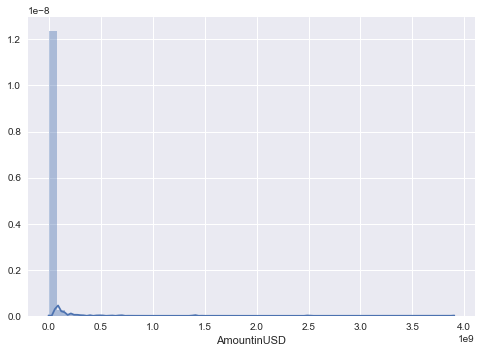

In [24]:
# Histograms
sns.distplot(fund_withAmts['AmountinUSD'])

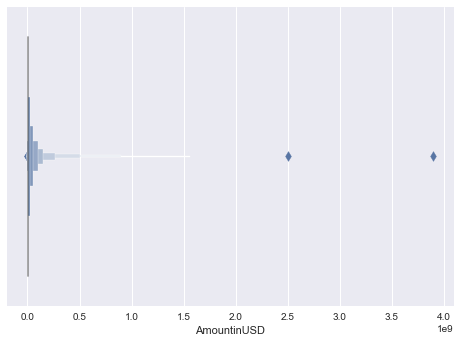

In [25]:
sns.set_style("darkgrid")
sns.boxenplot(fund_withAmts['AmountinUSD'])

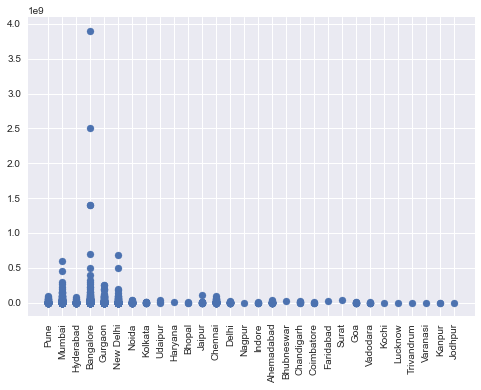

(1901, 8)

In [26]:
plt.scatter(fund_withAmts['CityLocation'], fund_withAmts['AmountinUSD'])
plt.xticks(rotation=90)
plt.show()
fund_withAmts.shape

In [27]:
fund_withAmts['AmountinUSD'].median()

1600000.0

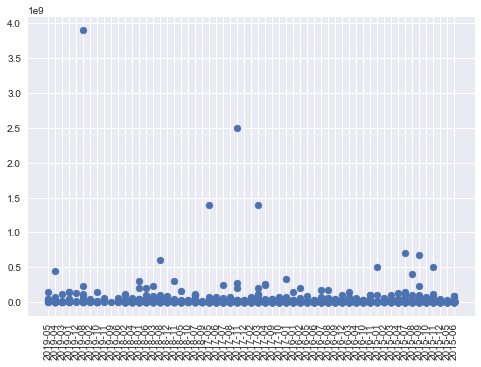

In [28]:
plt.scatter(fund_withAmts['MonthYear'], fund_withAmts['AmountinUSD'])
plt.xticks(rotation=90)
plt.show()

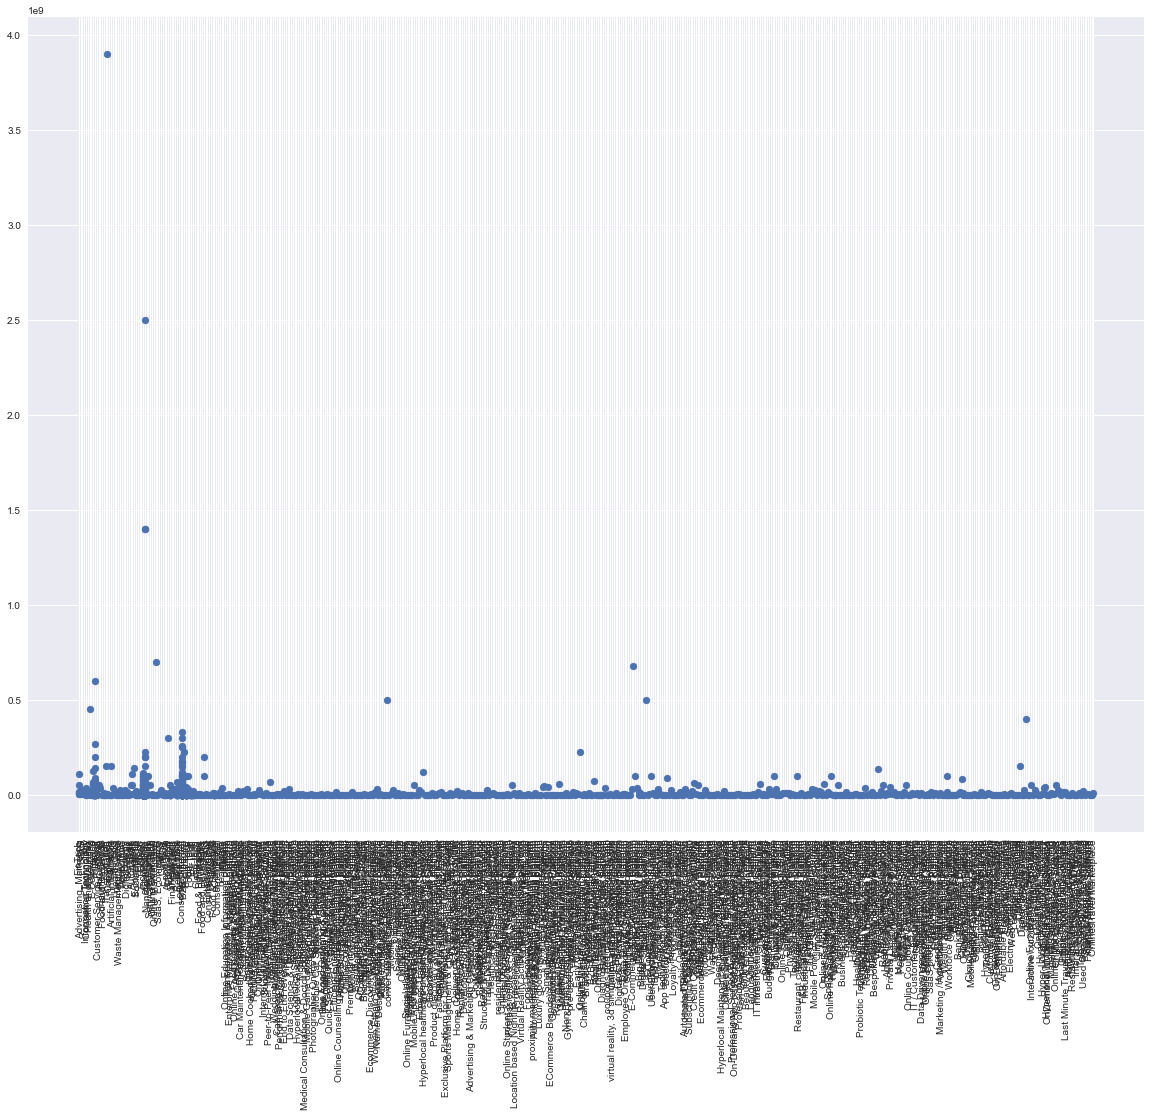

In [30]:
plt.figure(figsize=(20,15))
plt.scatter(fund_withAmts['IndustryVertical'], fund_withAmts['AmountinUSD'])
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x864 with 0 Axes>

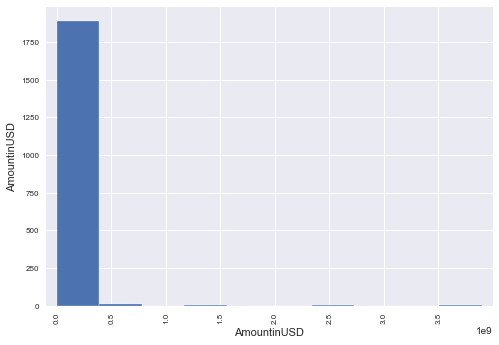

In [80]:
plt.figure(figsize=(20,12))
scatter_matrix(fund_withAmts)
plt.show()

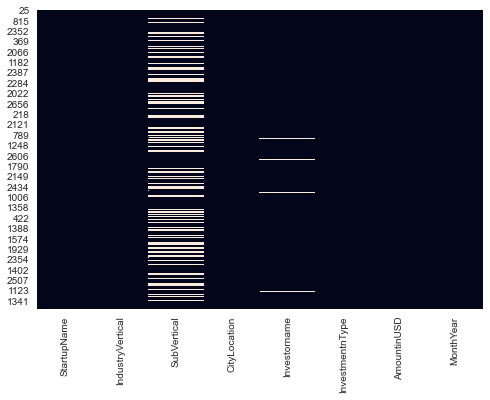

In [81]:
sns.heatmap(fund_withAmts.isnull(), cbar=False)
plt.show();

# Drop Outliers

In [32]:
fund_withAmts = fund_withAmts.sort_values(by=['AmountinUSD'], ascending=False)

In [33]:
round(2/100*fund_withAmts.shape[0]) #drop 2% outliers

38

In [34]:
fund_withAmts.describe()
fund_withAmts.shape

(1901, 8)

In [35]:
fund_withAmtsOLrem = fund_withAmts.iloc[round(2/100*fund_withAmts.shape[0]):,:] #drop 2% upper outliers

In [36]:
fund_withAmtsOLrem.describe()

,AmountinUSD
count,1.863000e+03
mean,7.952304e+06
std,1.661723e+07
min,1.800000e+04
25%,4.575000e+05
50%,1.500000e+06
75%,7.000000e+06
max,1.200000e+08


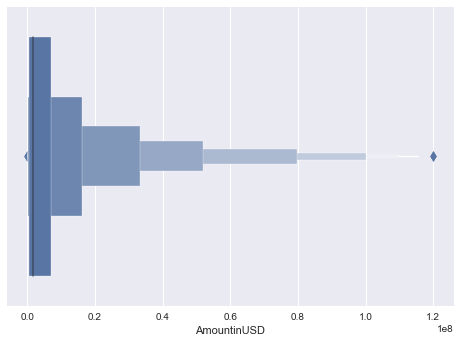

In [37]:
sns.boxenplot(fund_withAmtsOLrem['AmountinUSD'])

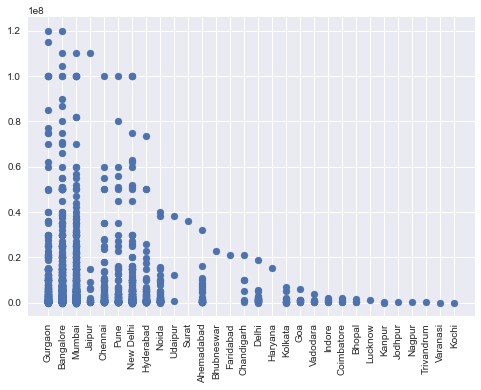

In [38]:
plt.scatter(fund_withAmtsOLrem['CityLocation'], fund_withAmtsOLrem['AmountinUSD'])
plt.xticks(rotation=90)
plt.show()

# Models 

In [39]:
fund_withAmtsOLrem.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,MonthYear
2239,Grofers,Hyper-local Grocery Delivery platform,NaN,Gurgaon,"Softbank, Tiger Global, Sequoia Capital, Apole...",Private Equity Round,120000000.0,2015-11
187,Cure Fit,Consumer Internet,Health and fitness Platform,Bangalore,"IDG Ventures, Accel Partners, Kalaari Capital ...",Private Equity Round,120000000.0,2018-07
353,Gaana,Technology,Online Music Streaming,Gurgaon,"Tencent Holdings Ltd, Times Internet",Private Equity Round,115000000.0,2018-02
19,Tala,FinTech,Digital Lending Platform,Mumbai,RPS Ventures,Series,110000000.0,2019-08
488,Ola Cabs,Consumer Internet,App based cab hailing services,Bangalore,"Tencent, Softbank Group",Private Equity Round,110000000.0,2017-03


,StartupName,AmountinUSD
2239,Grofers,120000000.0
187,Cure Fit,120000000.0
353,Gaana,115000000.0
19,Tala,110000000.0
488,Ola Cabs,110000000.0
81,CarDekho,110000000.0
756,Ola Cabs,104500000.0
1725,Oyo,100000000.0
940,Delhivery,100000000.0
1660,Fractal Analytics,100000000.0


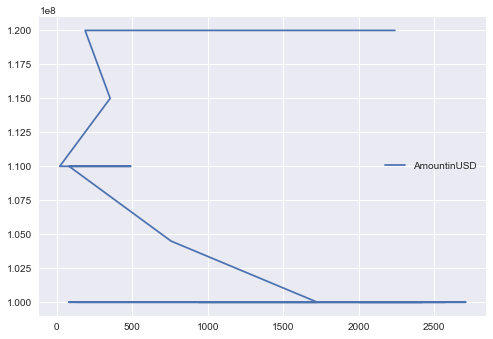

In [82]:
#Making a dataframe of top 20 start up name according to the amount that was invested in them

top20funding=(fund_withAmtsOLrem[['StartupName','AmountinUSD']].dropna()).sort_values(by='AmountinUSD',ascending = False).head(20)

top20funding.plot()
top20funding


Ola Cabs             2
Oyo                  1
Oyo Rooms            1
Tala                 1
OyoRooms             1
Dream11              1
Pepperfry            1
Foodpanda            1
Fractal Analytics    1
CarDekho             1
Oyorooms             1
Cure Fit             1
Shopclues            1
Grofers              1
Book My Show         1
Delhivery            1
Inmobi               1
Gaana                1
Saavn                1
Name: StartupName, dtype: int64

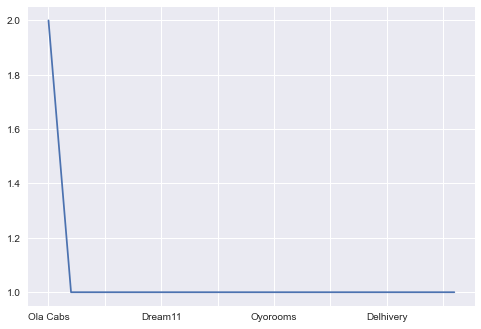

In [83]:
#Counting the frequency of startups in top 20 startups that were funded
top20fundingcount=(fund_withAmtsOLrem[['StartupName','AmountinUSD']].dropna()).sort_values(by='AmountinUSD',ascending = False).head(20)['StartupName'].value_counts()
top20fundingcount.plot()
top20fundingcount

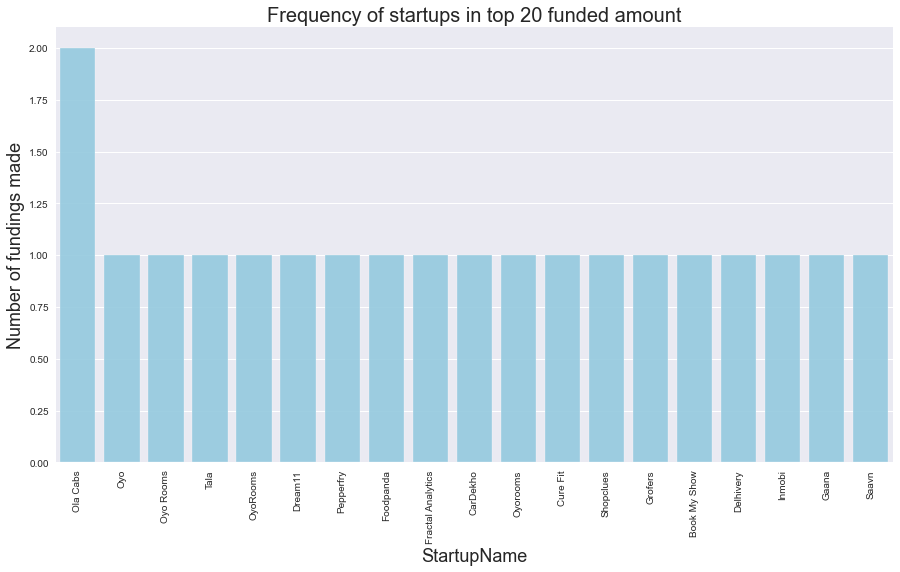

In [84]:
##Plotting the frequency of startups in top 20 startups that were funded

plt.figure(figsize=(15,8))
sns.barplot(top20fundingcount.index, top20fundingcount.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical')
plt.xlabel('StartupName', fontsize=18)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Frequency of startups in top 20 funded amount", fontsize=20)
plt.show()


In [86]:
#Creating a new dataframe with StartupName and the amount they got as funding
nameamount=fund_withAmtsOLrem[['StartupName','AmountinUSD']]

In [87]:
#Grouping the dataframe according to StartupName and sorting it out accoring to number of funding they recieved
nameamount=nameamount.groupby('StartupName').sum().sort_values(by='AmountinUSD',ascending=False)

#How much of funding is recieved by how much of startups
np.sum((nameamount/np.sum(nameamount)*100).head(53))

len(nameamount)

53/1268*100

4.17981072555205

#### 70% amount of funding is recieved by 4.1% of startup

# Which industries are favored by investors for funding?

In [89]:
#Percentage of null values in dataframe
len(fund_withAmtsOLrem[fund_withAmtsOLrem['IndustryVertical'].isnull()==True])/len(fund_withAmtsOLrem['IndustryVertical'])*100

0.0

In [90]:
#Industries that recieved funding more than 3 times
fund_withAmtsOLrem['IndustryVertical'].value_counts()[fund_withAmtsOLrem['IndustryVertical'].value_counts()>3]

Consumer Internet       578
Technology              308
eCommerce               163
Finance                  52
Healthcare               43
Logistics                22
E-Commerce               21
Education                17
Food & Beverage          15
Ed-Tech                  12
IT                        8
E-commerce                8
Fin-Tech                  6
FinTech                   6
Online Food Delivery      5
Food and Beverage         5
Logistics Tech            4
Others                    4
Name: IndustryVertical, dtype: int64

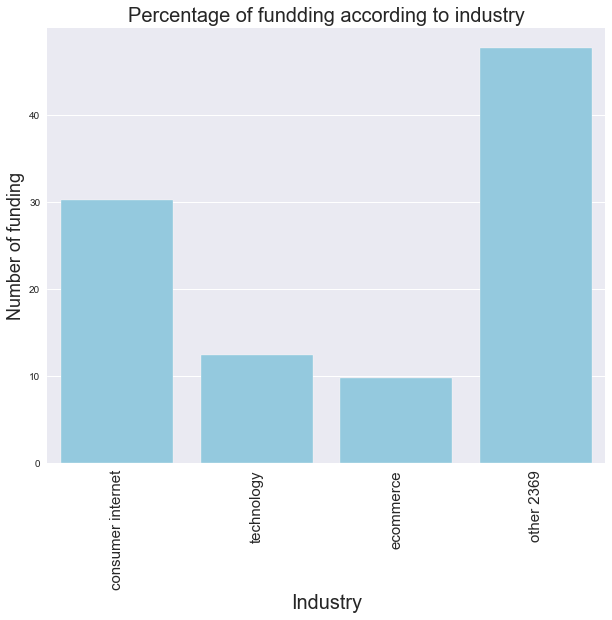

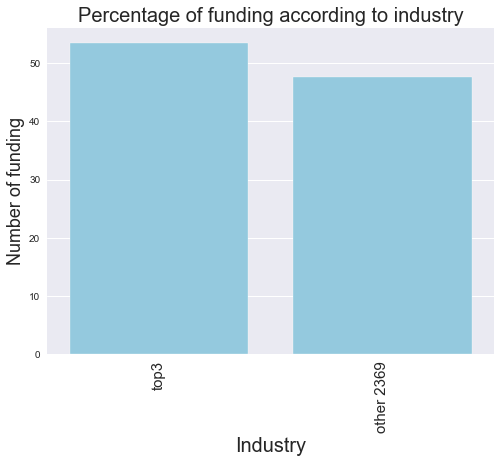

In [91]:
#Top 3 industries with most frequent funding recieved
(fund_withAmtsOLrem['IndustryVertical'].value_counts()/len(fund_withAmtsOLrem['IndustryVertical'])*100)[0:3]

x_barindustry=np.array(['consumer internet','technology','ecommerce','other 2369'])     
y_barindustry=np.array([30.229508,12.393443,9.770492,47.6])

plt.figure(figsize=(10,8))
sns.barplot(x_barindustry,y_barindustry,color='skyblue')
plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Industry', fontsize=20)
plt.ylabel('Number of funding', fontsize=18)
plt.title("Percentage of fundding according to industry", fontsize=20)

plt.show()

#Comparing investments of top 3 industries vs the rest
x_barindustry_top3=np.array(['top3','other 2369'])     
y_barindustry_top3=np.array([53.4,47.6])


plt.figure(figsize=(8,6))
sns.barplot(x_barindustry_top3,y_barindustry_top3,color='skyblue')
plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Industry', fontsize=20)
plt.ylabel('Number of funding', fontsize=18)
plt.title("Percentage of funding according to industry", fontsize=20)

plt.show()

In [92]:
#Creating new dataframe with the industry name and amount invested in respective industries
indamount=fund_withAmtsOLrem[['IndustryVertical','AmountinUSD']]

#Grouping the dataframe according to industries and sorting it according to the amount invested
indamount=indamount.groupby('IndustryVertical').sum().sort_values(by='AmountinUSD',ascending=False)

#How much investment is done in how many of industries?
np.sum((indamount/indamount.sum()*100).head(9))

len(indamount)

9/508*100

1.7716535433070866

#### 71.2% of investment is done in 1.7% industries

# ● Do cities play a major role in funding?

In [94]:
#Creating new dataframe which is sorted according to frequency of investments that is allocated as per State
topStatefunded=fund_withAmtsOLrem['CityLocation'].value_counts()[fund_withAmtsOLrem['CityLocation'].value_counts()>10]

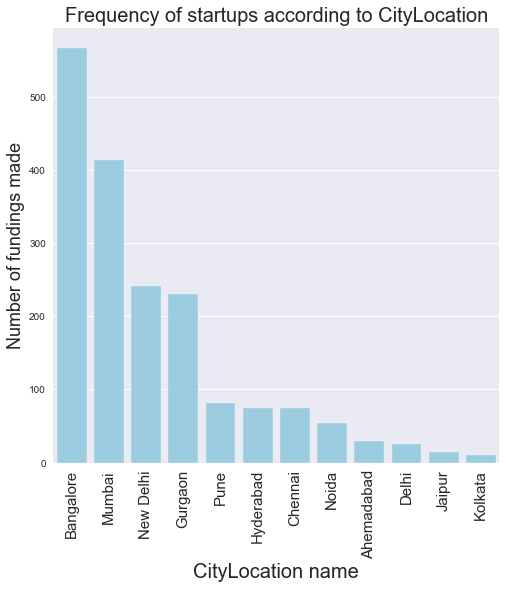

In [95]:
plt.figure(figsize=(8,8))
sns.barplot(topStatefunded.index, topStatefunded.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('CityLocation name', fontsize=20)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Frequency of startups according to CityLocation", fontsize=20)

plt.show()



In [96]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

Text(0.5, 1.0, 'Distribution of Startups across Top CityLocation')

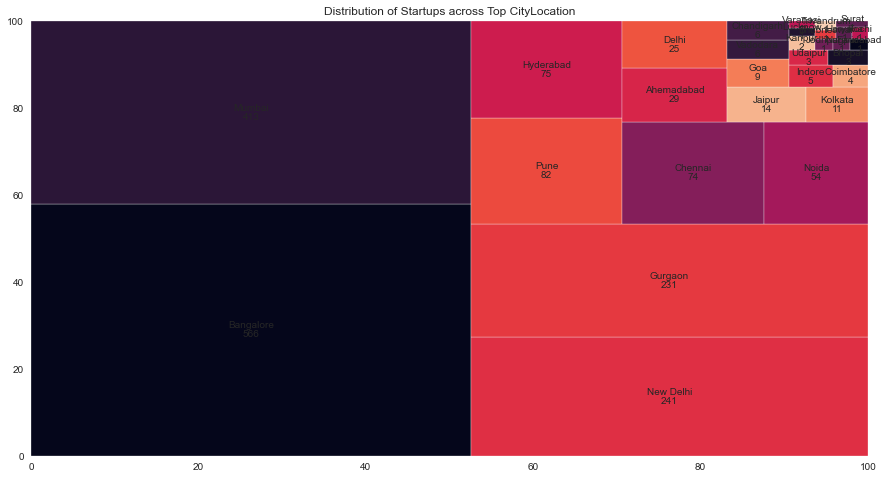

In [97]:
plt.figure(figsize=(15,8))
count = fund_withAmtsOLrem['CityLocation'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of Startups across Top CityLocation')

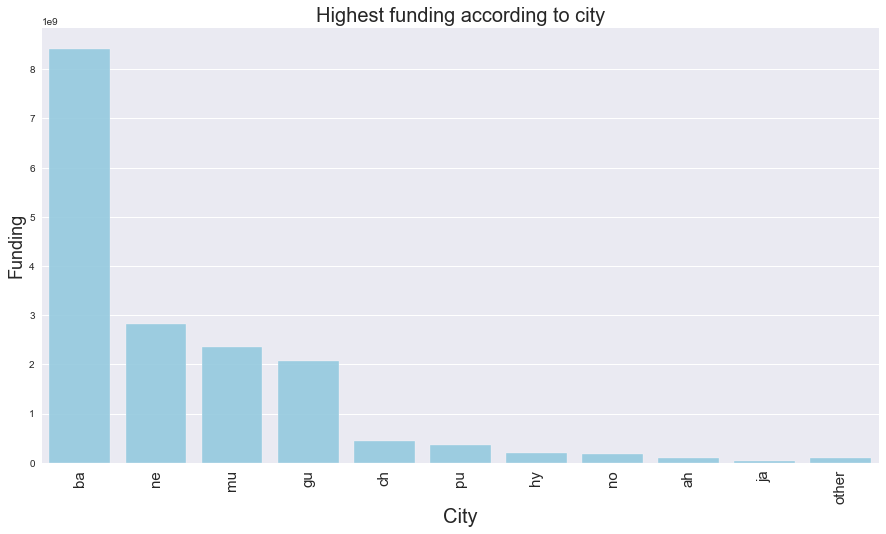

In [98]:
#Creating new dataframe which is sorted according to the amount of investment that is allocated
cityamount=fund_withAmtsOLrem[['CityLocation','AmountinUSD']].dropna().sort_values(by='AmountinUSD')

cityamount=cityamount.groupby('CityLocation').sum().sort_values(by='AmountinUSD',ascending=False)

x_barcity=np.array(['ba', 'ne', 'mu', 'gu', 'ch', 'pu', 'hy', 'no', 'ah', 'ja','other'])
y_barcity=np.array([8.42297411e+09,
       2.82019750e+09,
       2.35493450e+09,
       2.06902150e+09,
       4.37205000e+08,
       3.66653000e+08,
       1.95362000e+08,
       1.70638000e+08,
       9.81860000e+07,
       3.55600000e+07,
            104791000.0
            ])

plt.figure(figsize=(15,8))
sns.barplot(x_barcity,y_barcity, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('City', fontsize=20)
plt.ylabel('Funding', fontsize=18)
plt.title("Highest funding according to city", fontsize=20)

plt.show()


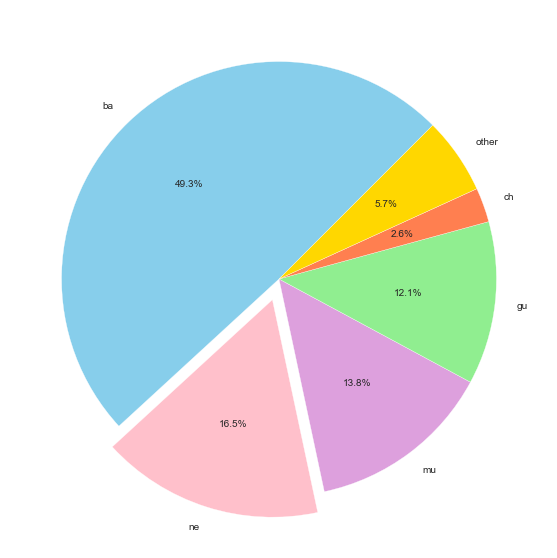

In [99]:
#Creating a pie diagram which shows how much funding is given as per cities
x_piecity=np.array(['ba', 'ne', 'mu', 'gu', 'ch', 'other'])
y_piecity=np.array([8.42297411e+09,
       2.82019750e+09,
       2.35493450e+09,
       2.06902150e+09,
       4.37205000e+08,
      971190000.0
            ])

plt.figure(figsize=(10,10))
plt.pie(y_piecity,labels=(x_piecity),autopct='%1.1f%%',colors=['skyblue','pink','plum','lightgreen','coral','gold'],explode=[0,0.1,0,0,0,0],startangle=45)
plt.rcParams['font.size'] = 16
plt.show()

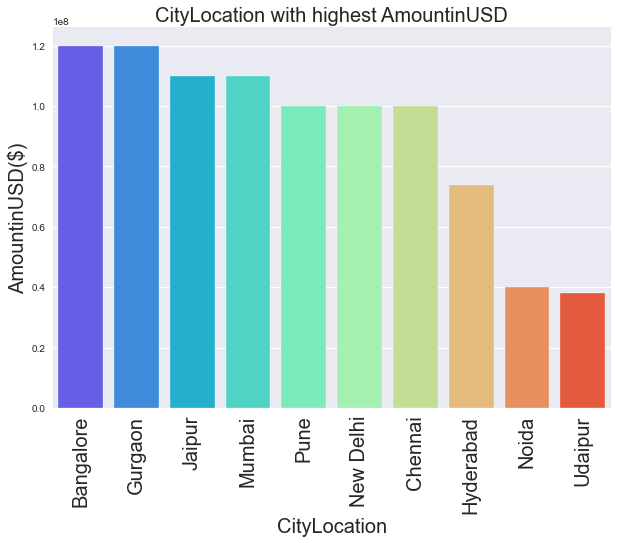

In [101]:
plot_gross1 = pd.DataFrame(fund_withAmtsOLrem.groupby(['CityLocation'])['AmountinUSD'].max().sort_values(ascending=False)[:10]).reset_index()
plot_gross1 = plot_gross1[plot_gross1['AmountinUSD'] > 0]  
plot_gross1.head(10)
plt.subplots(figsize=(10,7))
sns.barplot(x='CityLocation',y='AmountinUSD',data=plot_gross1,palette='rainbow', )
plt.ylabel('AmountinUSD($)', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('CityLocation', fontsize=20)
plt.title('CityLocation with highest AmountinUSD', fontsize=20)
plt.show()

In [102]:
#How much investment is done in how many of cities?

(np.sum((cityamount/np.sum(cityamount)*100)[0:4]))

len(cityamount)

4/32*100

12.5

#### 91.7% of investment is done in 12.5% of cities

# ● Who are the important investors in the Indian Ecosystem?

In [103]:
#Top 10 investors according to frequency of funding
investorname=fund_withAmtsOLrem['Investorname'].value_counts().head(10)
investorname

Undisclosed Investors     90
Sequoia Capital           12
Kalaari Capital           12
Indian Angel Network      11
Accel Partners             9
Info Edge (India) Ltd      9
Trifecta Capital           8
Brand Capital              8
SAIF Partners              8
Nexus Venture Partners     7
Name: Investorname, dtype: int64

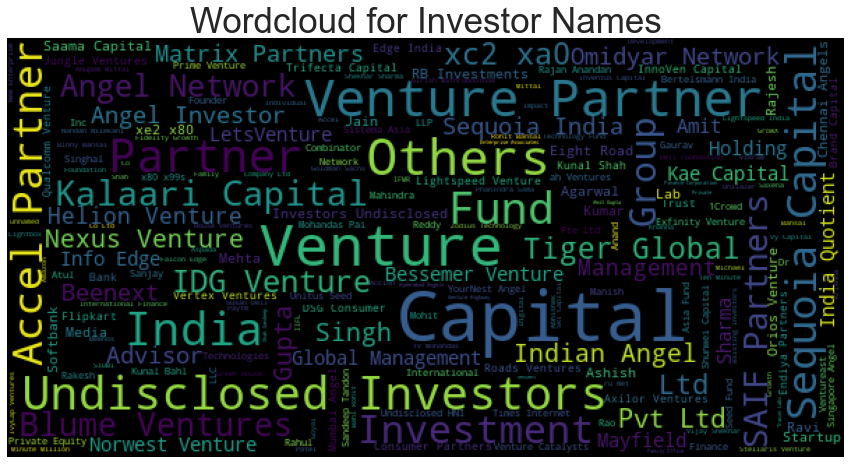

In [123]:
from wordcloud import WordCloud

names = fund_withAmtsOLrem["Investorname"][~pd.isnull(fund_withAmtsOLrem["Investorname"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()


In [104]:
#How much does the top 10 investors contribute in funding
np.sum((fund_withAmtsOLrem['Investorname'].value_counts()/len(fund_withAmtsOLrem['Investorname'])*100)[0:10])

9.339774557165862

In [105]:
#How much does the rest of investors contribute in funding
np.sum((fund_withAmtsOLrem['Investorname'].value_counts()/len(fund_withAmtsOLrem['Investorname'])*100)[10:])

89.69404186795492

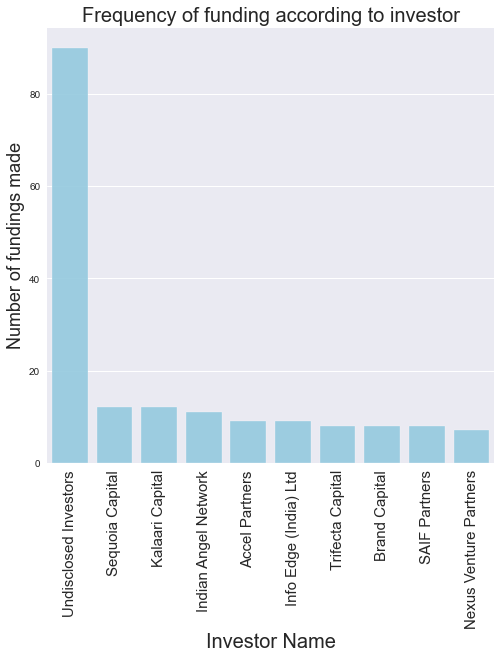

In [107]:
plt.figure(figsize=(8,8))
sns.barplot(investorname.index, investorname.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Investor Name', fontsize=20)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Frequency of funding according to investor", fontsize=20)

plt.show()

Private Equity Round    982
Seed Funding            718
Angel Funding            66
Series                   53
Debt                     26
Seed Round                4
Venture Round             3
Equity                    3
Inhouse Funding           1
Mezzanine                 1
Angel                     1
Structured Debt           1
Corporate Round           1
Term Loan                 1
Maiden Round              1
Angel Round               1
Name: InvestmentnType, dtype: int64
Private Equity Round    982
Seed Funding            718
Angel Funding            66
Series                   53
Debt                     26
Seed Round                4
Venture Round             3
Equity                    3
Inhouse Funding           1
Mezzanine                 1
Angel                     1
Structured Debt           1
Corporate Round           1
Term Loan                 1
Maiden Round              1
Angel Round               1
Name: InvestmentnType, dtype: int64


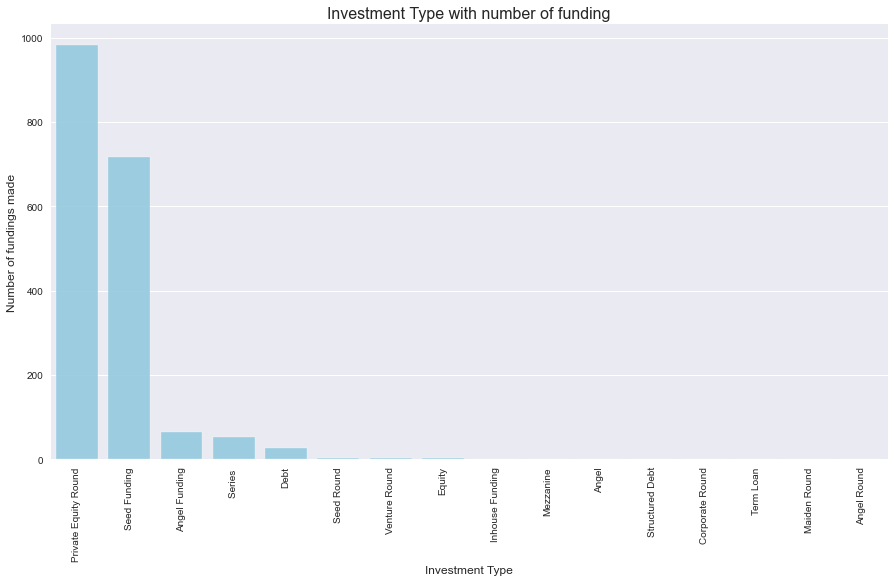

In [126]:
investment = fund_withAmtsOLrem['InvestmentnType'].value_counts()
print(investment)
investment = fund_withAmtsOLrem['InvestmentnType'].value_counts()
print(investment)
plt.figure(figsize=(15,8))
sns.barplot(investment.index, investment.values, alpha=0.9, color='skyblue')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()


In [108]:
#Creating new data frame with only Investor names and the amount they invested
investoramount=fund_withAmtsOLrem[['Investorname','AmountinUSD']]

In [109]:
investoramount.head(10)

,Investorname,AmountinUSD
2239,"Softbank, Tiger Global, Sequoia Capital, Apole...",120000000.0
187,"IDG Ventures, Accel Partners, Kalaari Capital ...",120000000.0
353,"Tencent Holdings Ltd, Times Internet",115000000.0
19,RPS Ventures,110000000.0
488,"Tencent, Softbank Group",110000000.0
81,"Sequoia India, Hillhouse Capital, Alphabet\\xe...",110000000.0
756,"Falcon Edge Capital,\\xc2\\xa0 Capital Advisers",104500000.0
188,"TPG, Norwest Venture Partners, Sequoia Capital...",100000000.0
323,Sandeep Mathur,100000000.0
322,Naspers,100000000.0


In [110]:
#Grouping investorname with the amount they have invested
investoramount=investoramount.groupby('Investorname').sum().sort_values(by='AmountinUSD',ascending=False)
investoramount.head(10)

,AmountinUSD
Investorname,
Sequoia Capital,174850000.0
Naspers,171000000.0
"Softbank, Tiger Global, Sequoia Capital, Apoletto Managers",120000000.0
"IDG Ventures, Accel Partners, Kalaari Capital and Others",120000000.0
"Tencent Holdings Ltd, Times Internet",115000000.0
Accel Partners,114200000.0
Tiger Global Management,113500000.0
"Sequoia India, Hillhouse Capital, Alphabet\\xe2\\x80\\x99s growth investment arm Capital G and Axis Bank",110000000.0
RPS Ventures,110000000.0


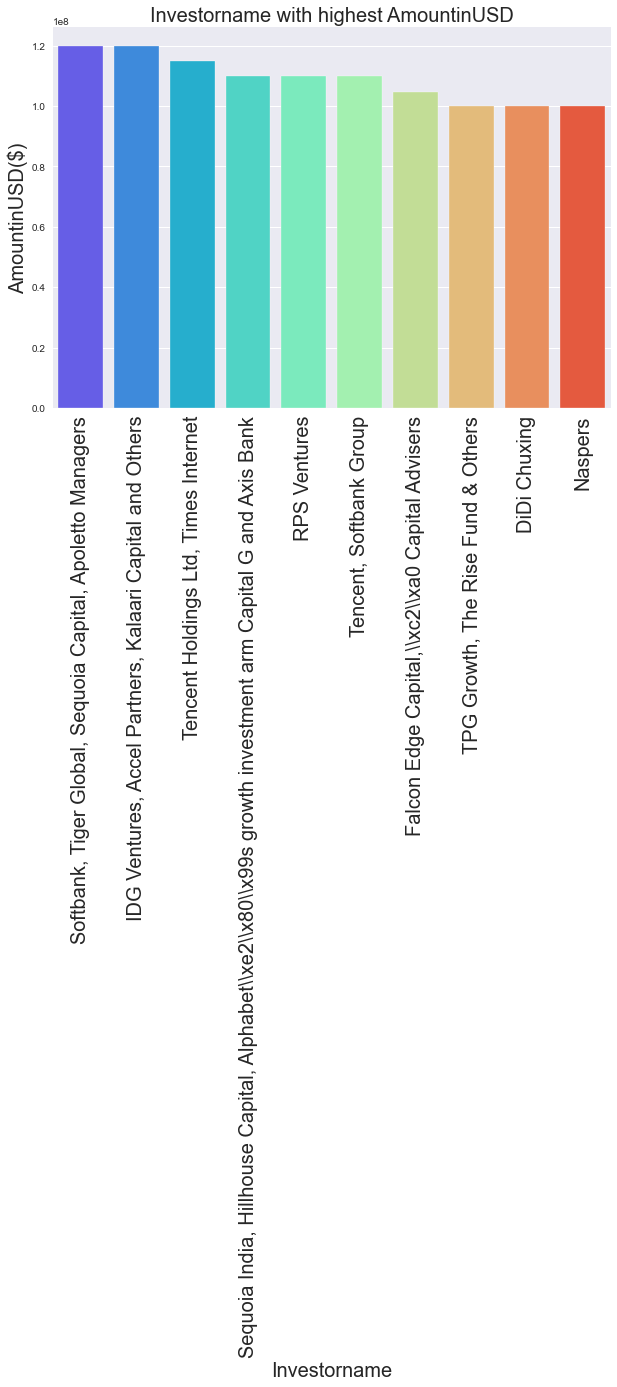

In [111]:
plot_gross = pd.DataFrame(fund_withAmtsOLrem.groupby(['Investorname'])['AmountinUSD'].max().sort_values(ascending=False)[:10]).reset_index()
plot_gross = plot_gross[plot_gross['AmountinUSD'] > 0]  
plt.subplots(figsize=(10,7))
sns.barplot(x='Investorname',y='AmountinUSD',data=plot_gross,palette='rainbow', )
plt.ylabel('AmountinUSD($)', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Investorname', fontsize=20)
plt.title('Investorname with highest AmountinUSD', fontsize=20)
plt.show()

In [112]:
#How much investment is done by how many of investors?
(np.sum((investoramount/np.sum(investoramount)*100)[0:36]))

len(investoramount)

36/703*100

5.120910384068279

#### 70.1% of investment is done by 5.1% of investors

In [113]:
#Creating new data frame with only Investor names and the amount they invested
subamount=fund_withAmtsOLrem[['SubVertical','AmountinUSD']]

In [114]:
subamount=(subamount.groupby('SubVertical').sum()).sort_values(by='AmountinUSD',ascending=False)
subamount

,AmountinUSD
SubVertical,
Online Lending Platform,255900000.0
Cab Aggregation App,154500000.0
Online Marketplace,148700000.0
Health and fitness Platform,120000000.0
App based cab hailing services,117700000.0
...,...
Cloud based Virtual Servers,22500.0
Audio Technology Solutions,22500.0
Mobile Email productivity tool,22500.0


In [115]:
#How much investment is done in Subvertical?

np.sum((subamount/np.sum(subamount)*100).head(39))

len(subamount)

39/815*100


4.785276073619632

In [117]:
#Grouping the data frame according to StartupNames
group=fund_withAmtsOLrem.groupby('StartupName')

In [118]:
#Sorting the dataframe according to amount of funding and capturing the 4.1% of startup that got 70% of funding
topstartup=group.first().sort_values('AmountinUSD',ascending=False).head(53)

In [119]:
topstartup.head()

,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,MonthYear
StartupName,,,,,,,
Cure Fit,Consumer Internet,Health and fitness Platform,Bangalore,"IDG Ventures, Accel Partners, Kalaari Capital ...",Private Equity Round,120000000.0,2018-07
Grofers,Hyper-local Grocery Delivery platform,Grocery Delivery,Gurgaon,"Softbank, Tiger Global, Sequoia Capital, Apole...",Private Equity Round,120000000.0,2015-11
Gaana,Technology,Online Music Streaming,Gurgaon,"Tencent Holdings Ltd, Times Internet",Private Equity Round,115000000.0,2018-02
Tala,FinTech,Digital Lending Platform,Mumbai,RPS Ventures,Series,110000000.0,2019-08
CarDekho,Automobile,Online Marketplace,Jaipur,"Sequoia India, Hillhouse Capital, Alphabet\\xe...",Series,110000000.0,2019-03


In [120]:
#Top frequency of all variables in this top topstartup dataframe
for x in topstartup.columns:
    print(x)
    print('*'*30)
    print(topstartup[x].value_counts()[topstartup[x].value_counts()>1])
    print('\n')

IndustryVertical
******************************
Consumer Internet    13
Technology            8
eCommerce             4
Finance               3
FinTech               2
Name: IndustryVertical, dtype: int64


SubVertical
******************************
Online Lending Platform    2
Name: SubVertical, dtype: int64


CityLocation
******************************
Mumbai       14
Bangalore    12
Gurgaon      10
New Delhi     8
Pune          4
Chennai       3
Name: CityLocation, dtype: int64


Investorname
******************************
Naspers    2
Name: Investorname, dtype: int64


InvestmentnType
******************************
Private Equity Round    45
Series                   6
Name: InvestmentnType, dtype: int64


AmountinUSD
******************************
100000000.0    16
60000000.0      7
75000000.0      4
110000000.0     3
55000000.0      3
82000000.0      2
52000000.0      2
120000000.0     2
70000000.0      2
Name: AmountinUSD, dtype: int64


MonthYear
******************************
2

In [121]:
#Percentage of top frequency of all variables in top topstartup dataframe
for x in topstartup.columns:
    print(x)
    print('*'*30)
    print((topstartup[x].value_counts()[topstartup[x].value_counts()/len(topstartup[x])*100>2])/len(topstartup[x])*100)
    print('\n')

IndustryVertical
******************************
Consumer Internet    24.528302
Technology           15.094340
eCommerce             7.547170
Finance               5.660377
FinTech               3.773585
Name: IndustryVertical, dtype: float64


SubVertical
******************************
Online Lending Platform    3.773585
Name: SubVertical, dtype: float64


CityLocation
******************************
Mumbai       26.415094
Bangalore    22.641509
Gurgaon      18.867925
New Delhi    15.094340
Pune          7.547170
Chennai       5.660377
Name: CityLocation, dtype: float64


Investorname
******************************
Naspers    3.773585
Name: Investorname, dtype: float64


InvestmentnType
******************************
Private Equity Round    84.905660
Series                  11.320755
Name: InvestmentnType, dtype: float64


AmountinUSD
******************************
100000000.0    30.188679
60000000.0     13.207547
75000000.0      7.547170
110000000.0     5.660377
55000000.0      5.66037

Consumer Internet    578
Technology           308
eCommerce            163
Finance               52
Healthcare            43
Logistics             22
E-Commerce            21
Education             17
Food & Beverage       15
Ed-Tech               12
Name: IndustryVertical, dtype: int64


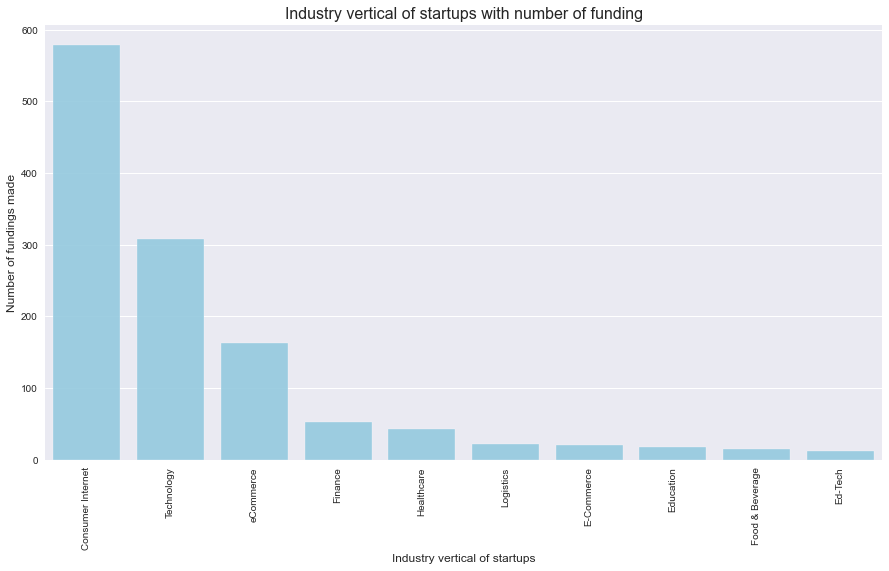

In [128]:
industry = fund_withAmtsOLrem['IndustryVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color='skyblue')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()


Online Lending Platform      11
Online Pharmacy               5
Online Lending                5
Online Learning Platform      4
Education                     4
Online Education Platform     4
Food Delivery Platform        4
Online Food Delivery          4
Online lending platform       4
SaaS                          3
Name: SubVertical, dtype: int64


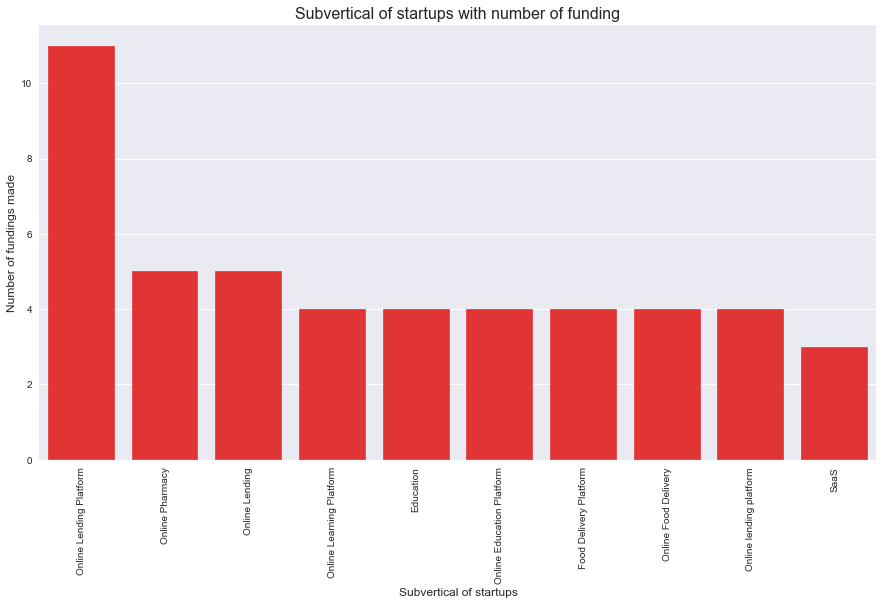

In [130]:
industry = fund_withAmtsOLrem['SubVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()


# One Hot Encoding

In [40]:
# predictor columns=['StartupName','IndustryVertical','SubVertical','CityLocation','InvestorsName','InvestmentType', 'Final Remarks','MonthYear'])
fund_LR = fund_withAmtsOLrem.copy()
col_predictor = ['StartupName','InvestmentnType','IndustryVertical','Investorname','CityLocation','MonthYear']
drop_columns = ['AmountinUSD', 'SubVertical']
X = pd.get_dummies(data=fund_LR, columns = col_predictor, drop_first=True)
X = X.drop(columns = drop_columns)
y = fund_LR['AmountinUSD']
X.head()

,StartupName_1mg,StartupName_1mg (Healthkartplus),StartupName_33Coupons,StartupName_360Ride,StartupName_3Dexter,StartupName_3HCare,StartupName_3rdFlix,StartupName_48East,StartupName_4tigo,StartupName_5th Vital,...,MonthYear_2019-02,MonthYear_2019-03,MonthYear_2019-04,MonthYear_2019-05,MonthYear_2019-06,MonthYear_2019-08,MonthYear_2019-09,MonthYear_2019-10,MonthYear_2019-11,MonthYear_2019-12
2239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=100, train_size=0.7, test_size=0.3)

In [42]:
lr = LinearRegression()
def calc_mse_linear_reg(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred1 = model.predict(X_train)
    print("RMSE-train {:.3f}".format((mean_squared_error(y_train, y_pred1))**0.5))
    print("RMSE-test {:.3f}".format((mean_squared_error(y_test, y_pred))**0.5))
    print("Accuracy Train: {:.3f} Test: {:.3f}".format(model.score(X_train,y_train),model.score(X_test,y_test)))
    return (mean_squared_error(y_train, y_pred1))**0.5, (mean_squared_error(y_test, y_pred))**0.5

In [43]:
calc_mse_linear_reg(lr,X_train, X_test, y_train, y_test)

RMSE-train 0.000
RMSE-test 14125607.683
Accuracy Train: 1.000 Test: 0.149


(1.2121515030677964e-07, 14125607.68324172)

In [44]:
p=16000
steps=[('model', Lasso(alpha=p))]
lasso_pipe=Pipeline(steps)
lasso_pipe.fit(X_train, y_train)
print('alpha {}'.format(p))
calc_mse_linear_reg(lasso_pipe,X_train, X_test, y_train, y_test)
print('\n')

alpha 16000
RMSE-train 7360684.060
RMSE-test 14000842.855
Accuracy Train: 0.816 Test: 0.164




In [45]:
p=0.8
steps=[('model', Ridge(alpha=p))]
ridge_pipe=Pipeline(steps)
ridge_pipe.fit(X_train, y_train)
print('alpha {}'.format(p))
calc_mse_linear_reg(ridge_pipe,X_train, X_test, y_train, y_test)
print('\n')

alpha 0.8
RMSE-train 4042377.580
RMSE-test 14055562.455
Accuracy Train: 0.944 Test: 0.158




In [46]:
ridge_pipe.named_steps['model']

Ridge(alpha=0.8)

# Decision Tree Regression

In [47]:
fund_DT = fund_withAmtsOLrem.copy()
#missing data observing in columns
total = fund_withAmtsOLrem.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((fund_withAmtsOLrem.isnull().sum(axis=0)/fund_withAmtsOLrem.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
SubVertical,508,27.267848
Investorname,18,0.966184
MonthYear,0,0.000000
AmountinUSD,0,0.000000
InvestmentnType,0,0.000000
CityLocation,0,0.000000
IndustryVertical,0,0.000000
StartupName,0,0.000000


In [48]:
fund_DT=fund_DT.fillna('')
fund_DT.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,MonthYear
2239,Grofers,Hyper-local Grocery Delivery platform,,Gurgaon,"Softbank, Tiger Global, Sequoia Capital, Apole...",Private Equity Round,120000000.0,2015-11
187,Cure Fit,Consumer Internet,Health and fitness Platform,Bangalore,"IDG Ventures, Accel Partners, Kalaari Capital ...",Private Equity Round,120000000.0,2018-07
353,Gaana,Technology,Online Music Streaming,Gurgaon,"Tencent Holdings Ltd, Times Internet",Private Equity Round,115000000.0,2018-02
19,Tala,FinTech,Digital Lending Platform,Mumbai,RPS Ventures,Series,110000000.0,2019-08
488,Ola Cabs,Consumer Internet,App based cab hailing services,Bangalore,"Tencent, Softbank Group",Private Equity Round,110000000.0,2017-03


In [49]:
cat_var = ['IndustryVertical','CityLocation','Investorname','InvestmentnType', 'MonthYear']
left_var = []
le = LabelEncoder()
for column in cat_var:
    fund_DT.loc[:,column] = le.fit_transform(fund_DT.loc[:,column])
fund_DT.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,MonthYear
2239,Grofers,215,,10,1238,9,120000000.0,10
187,Cure Fit,69,Health and fitness Platform,1,522,9,120000000.0,42
353,Gaana,503,Online Music Streaming,10,1308,9,115000000.0,37
19,Tala,153,Digital Lending Platform,20,1003,12,110000000.0,54
488,Ola Cabs,69,App based cab hailing services,1,1310,9,110000000.0,26


In [50]:
col_DT = ['IndustryVertical','CityLocation','InvestmentnType', 'MonthYear']
X = fund_DT.loc[:,col_DT]
y = fund_DT['AmountinUSD']

In [51]:
n = 9
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=n, train_size=0.75, test_size=0.25)
model = DecisionTreeRegressor(random_state=n)

In [52]:
params = {'criterion': ['mae', 'mse'], 'max_depth':[1,2,3,4,5,6,7,8,9,10], 'max_features':['sqrt','log2'], 'min_weight_fraction_leaf':[0.002, 0.0025]}
grid_search = GridSearchCV(estimator = model, param_grid = params)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
print(cross_val_score(grid_search.best_estimator_, X_train, y_train))
print('Test Score {:.3f}'.format(r2_score(y_test, y_pred)))
print('Test Error {:.3f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('Train Score {:.3f}'.format(r2_score(y_train, grid_search.predict(X_train))))
print('Train Error {:.3f}'.format(mean_squared_error(y_train, grid_search.predict(X_train))**0.5))
grid_search.best_estimator_

[0.15041632 0.07270791 0.1161707  0.17375903 0.11319069]
Test Score 0.198
Test Error 13755110.486
Train Score 0.138
Train Error 15792629.017


DecisionTreeRegressor(max_depth=2, max_features='sqrt',
                      min_weight_fraction_leaf=0.002, random_state=9)

In [53]:
import graphviz

In [54]:
dt_tree=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0025,
           presort=False, random_state=9, splitter='best')
dt_tree.fit(X_train, y_train)
X = 'IndustryVertical','CityLocation','InvestmentnType', 'MonthYear'
y = 'AmountinUSD'
dot_data = tree.export_graphviz(dt_tree, out_file=None,
                               feature_names=X,
                               class_names=y,
                               filled=True, rounded=True,
                               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)


# Random Forest

In [55]:
rfr = RandomForestRegressor(random_state=9)
parameter = {'n_estimators': [2,5,10,20,50], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['mse', 'mae'],
              'max_depth': [1,2,4,6,8,10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,3,5]
             }
#task find the results for the given params
grid_rf = GridSearchCV(estimator = rfr, param_grid = parameter)
grid_rf.fit(X_train, y_train)
grid_rf.best_estimator_

RandomForestRegressor(max_depth=6, max_features='log2', min_samples_leaf=5,
                      n_estimators=50, random_state=9)

In [56]:
#task find the results for the given params
grid_rf = GridSearchCV(estimator = rfr, param_grid = parameter)
grid_rf.fit(X_train, y_train)
grid_rf.best_estimator_

RandomForestRegressor(max_depth=6, max_features='log2', min_samples_leaf=5,
                      n_estimators=50, random_state=9)

In [58]:
xgbr = XGBRegressor(random_state=9)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)
r2_score(y_test, y_pred_xgbr)

-0.2735410287567477

In [59]:
mean_squared_error(y_test, y_pred_xgbr)**0.5

17333987.80201929

In [ ]:
import pickle

pickle.dump(selmod.ranfo, open('ranf.pkl','wb'))

#pickle.dump(ranf_fit,open('randomforest.pkl', 'wb'))

pickle.dump(selmod.linr,open('linear.pkl','wb'))

#pickle.dump(best_random_grid,open('randomizedsearch.pkl','wb'))